<a href="https://colab.research.google.com/github/Anirudh-Goel05/ML-CB/blob/master/imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
print(XT.shape)
print(YT.shape)

(25000,)
(25000,)


In [5]:
vocab = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
from keras.preprocessing import sequence

In [0]:
X_train = sequence.pad_sequences(XT,maxlen=500)
X_test = sequence.pad_sequences(Xt,maxlen=500)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,SimpleRNN

In [10]:
model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [11]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
ModelCheckpoint?

In [0]:
checkpoint = ModelCheckpoint(filepath='best_model.h5',monitor='val_loss',save_best_only=True,save_weights_only=False)
earlystop = EarlyStopping(monitor='val_loss',patience=2,restore_best_weights=True)

In [16]:
hist = model.fit(X_train,YT,validation_split=0.1,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])




Train on 22500 samples, validate on 2500 samples
Epoch 1/10





22500/22500 [==============================] - 24s 1ms/step - loss: 0.5671 - acc: 0.7012 - val_loss: 0.4343 - val_acc: 0.8096
Epoch 2/10
22500/22500 [==============================] - 24s 1ms/step - loss: 0.3456 - acc: 0.8595 - val_loss: 0.3758 - val_acc: 0.8564
Epoch 3/10
22500/22500 [==============================] - 23s 1ms/step - loss: 0.2697 - acc: 0.8925 - val_loss: 0.3429 - val_acc: 0.8720
Epoch 4/10
22500/22500 [==============================] - 24s 1ms/step - loss: 0.2032 - acc: 0.9218 - val_loss: 0.4221 - val_acc: 0.8580
Epoch 5/10
22500/22500 [==============================] - 24s 1ms/step - loss: 0.1508 - acc: 0.9447 - val_loss: 0.3821 - val_acc: 0.8612


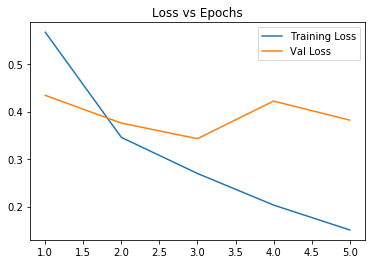

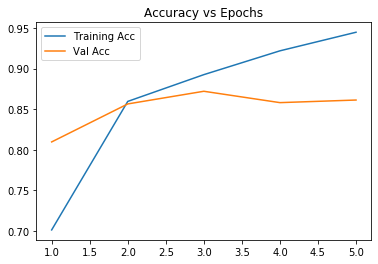

In [17]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()



plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

In [18]:
!ls

best_model.h5  sample_data


In [0]:
from keras.models import load_model

In [21]:
model_loaded =  load_model('best_model.h5')
model_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_loaded.evaluate(X_test,Yt)

25000/25000 [==============================] - 15s 611us/step


[0.3515215537261963, 0.86212]

In [23]:
model_loaded.evaluate(X_train,YT)

25000/25000 [==============================] - 15s 602us/step


[0.1897074516248703, 0.93072]